# DSML Final project : E-Shop Clothing Sales Analysis and Price Prediction

#### Project Overview
This project analyzes an e-shop clothing sales dataset from 2008 to build regression models for predicting clothing prices based on various attributes like category, color, location, and photography style.

#### Objective
Build a regression model to predict clothing prices based on product attributes and session characteristics.

### 1: Import necessary libraries


In [1]:
 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectKBest, f_regression

### 2: Load the data

In [2]:
df = pd.read_csv('e-shop clothing 2008.csv', delimiter=';')

#### 3.  Initial data exploration

In [3]:
print(df.head())
print(df.tail())
print(df.info())
print(df.describe())

   year  month  day  order  country  session ID  page 1 (main category)  \
0  2008      4    1      1       29           1                       1   
1  2008      4    1      2       29           1                       1   
2  2008      4    1      3       29           1                       2   
3  2008      4    1      4       29           1                       2   
4  2008      4    1      5       29           1                       2   

  page 2 (clothing model)  colour  location  model photography  price  \
0                     A13       1         5                  1     28   
1                     A16       1         6                  1     33   
2                      B4      10         2                  1     52   
3                     B17       6         6                  2     38   
4                      B8       4         3                  2     52   

   price 2  page  
0        2     1  
1        2     1  
2        1     1  
3        2     1  
4        1     

### 4: Data Cleaning

In [4]:
# Checking for missing values
print(df.isnull().sum())

year                       0
month                      0
day                        0
order                      0
country                    0
session ID                 0
page 1 (main category)     0
page 2 (clothing model)    0
colour                     0
location                   0
model photography          0
price                      0
price 2                    0
page                       0
dtype: int64


In [5]:
# Handling duplicates
print(f"Initial shape: {df.shape}")
df = df.drop_duplicates()
print(f"After dropping duplicates: {df.shape}")

Initial shape: (165474, 14)
After dropping duplicates: (165474, 14)


In [7]:
# Convert categorical columns to appropriate types
categorical_cols = ['page 1 (main category)', 'colour', 'location', 'model photography', 'page']
for col in categorical_cols:
    df[col] = df[col].astype('category')

### 5: Handle outliers using boxplots

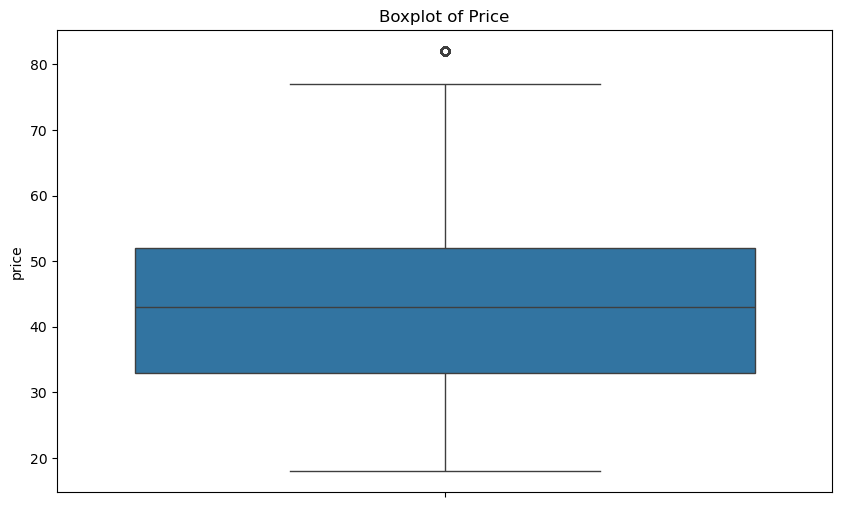

In [8]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, y='price')
plt.title('Boxplot of Price')
plt.show()

In [9]:
# Function to remove outliers using IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

df_clean = remove_outliers(df, 'price')
print(f"After removing price outliers: {df_clean.shape}")

After removing price outliers: (163551, 14)


### 6: Data Visualization

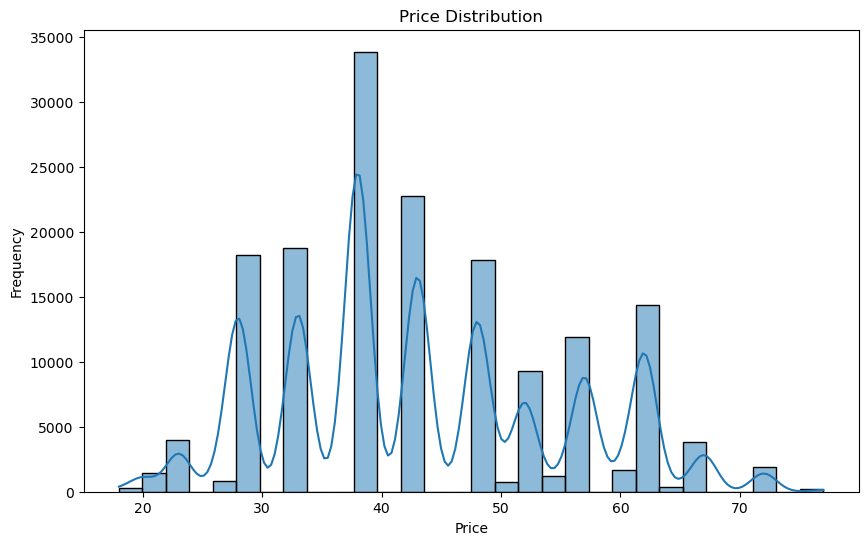

In [10]:
# Price distribution
plt.figure(figsize=(10, 6))
sns.histplot(df_clean['price'], bins=30, kde=True)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

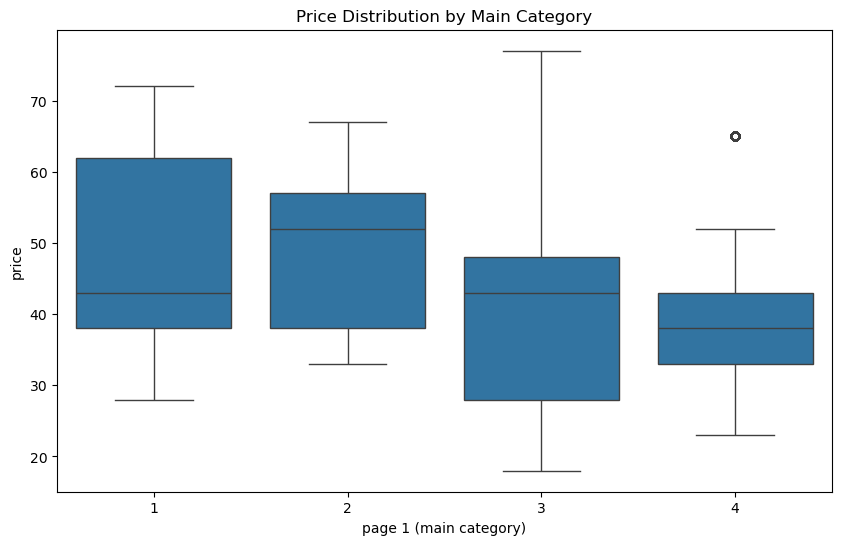

In [11]:
# Price by main category
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_clean, x='page 1 (main category)', y='price')
plt.title('Price Distribution by Main Category')
plt.show()

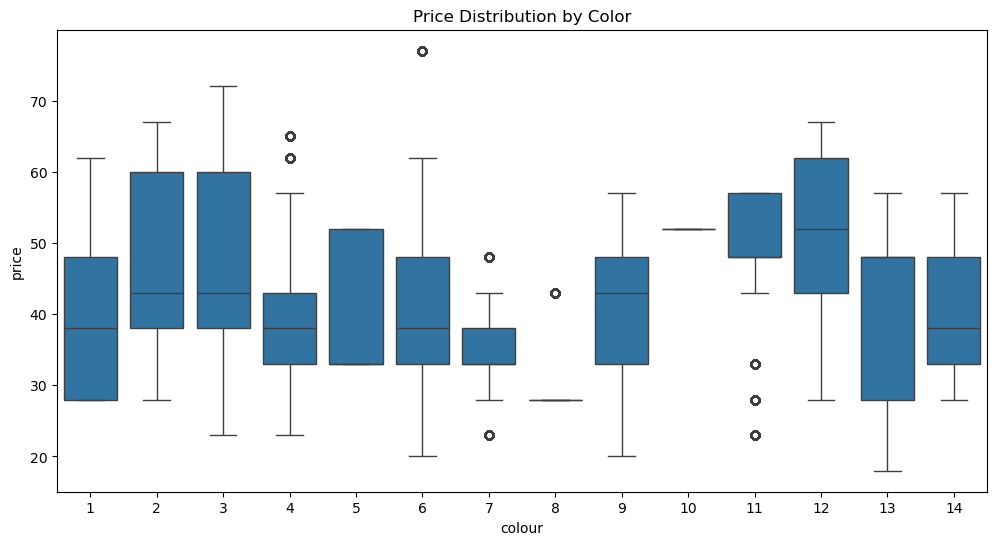

In [12]:
# Price by color
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_clean, x='colour', y='price')
plt.title('Price Distribution by Color')
plt.show()

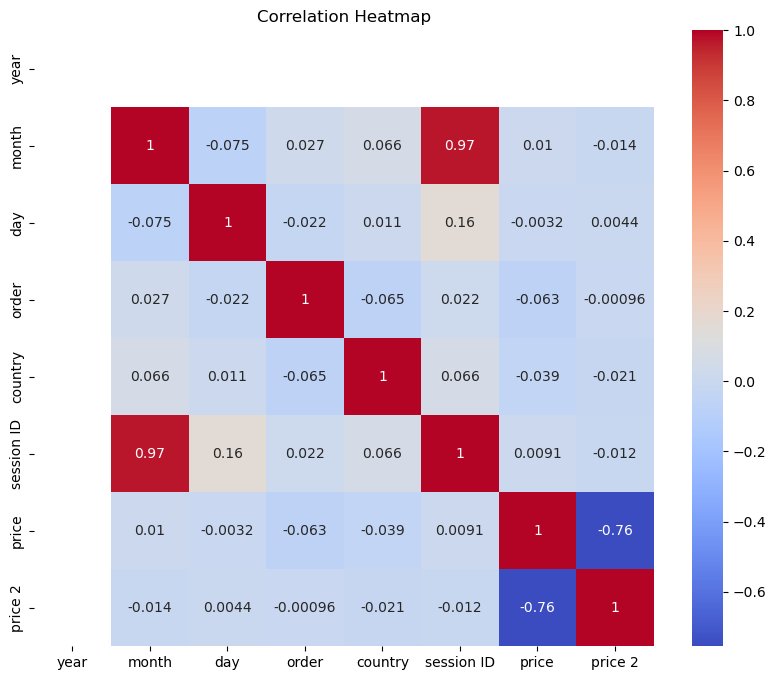

In [13]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_clean.select_dtypes(include=['float64', 'int64']).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()